In [2]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import numpy
import numpy as np
import csv
import sklearn
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import optimizers
from keras import backend as K
import random
import h5py
import scipy.io as sio
import pandas as pd
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

/home/heng/tfcpu/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/heng/tfcpu/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import pandas as pd
import numpy as np
data_dim=4
data_raw=pd.read_csv('train.csv')
data_x=data_raw.sequence.values.tolist()
num_sample=len(data_x)
data_y=data_raw.label.values.tolist()
X_train=np.zeros([num_sample,data_dim])
Y_train=np.zeros(num_sample)
i=0
for sample in data_x:
    j=0
    for character in sample:
        if character == 'A':
            X_train[i,0]=X_train[i,0]+1
        if character == 'C':
            X_train[i,1]=X_train[i,1]+1
        if character == 'G':
            X_train[i,2]=X_train[i,2]+1
        if character == 'T':
            X_train[i,3]=X_train[i,3]+1
        j=j+1
    Y_train[i]=data_y[i]
    i=i+1
    
index=np.arange(len(X_train))
np.random.shuffle(index)
X_train=X_train[index,:]
Y_train=Y_train[index]

In [4]:
optm=keras.optimizers.Adam(lr=0.00002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
def SimpleMLP_model():
	# create model
    model = Sequential()
    model.add(Dense(32, input_dim=data_dim, init='normal'))
    model.add(Activation('relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(16, init='normal')) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optm, metrics=['accuracy'])
    return model

model = SimpleMLP_model()
M=1800
history=model.fit(X_train[0:M,:], Y_train[0:M],validation_data=(X_train[M+1:1999,:],  Y_train[M+1:1999]), nb_epoch=500, batch_size=50)
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Baseline Error: %.2f%%" % (100-scores[1]*100))
#model.save('gene.h5') 

/home/heng/tfcpu/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, kernel_initializer="normal", input_dim=4)`
  """
/home/heng/tfcpu/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="normal")`
  
/home/heng/tfcpu/local/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1800 samples, validate on 198 samples
Epoch 1/500
1800/1800 [==============================] - 0s 171us/step - loss: 0.6910 - acc: 0.4850 - val_loss: 0.6918 - val_acc: 0.4798
Epoch 2/500
1800/1800 [==============================] - 0s 50us/step - loss: 0.6876 - acc: 0.4889 - val_loss: 0.6892 - val_acc: 0.4798
Epoch 3/500
1800/1800 [==============================] - 0s 51us/step - loss: 0.6855 - acc: 0.4922 - val_loss: 0.6866 - val_acc: 0.4798
Epoch 4/500
1800/1800 [==============================] - 0s 41us/step - loss: 0.6827 - acc: 0.4900 - val_loss: 0.6839 - val_acc: 0.4798
Epoch 5/500
1800/1800 [==============================] - 0s 38us/step - loss: 0.6804 - acc: 0.5000 - val_loss: 0.6814 - val_acc: 0.4798
Epoch 6/500
1800/1800 [==============================] - 0s 39us/step - loss: 0.6797 - acc: 0.5133 - val_loss: 0.6790 - val_acc: 0.4798
Epoch 7/500
1800/1800 [==============================] - 0s 41us/step - loss: 0.6758 - acc: 0.5339 - val_loss: 0.6768 - val_acc: 0.4798


1800/1800 [==============================] - 0s 40us/step - loss: 0.5432 - acc: 0.8228 - val_loss: 0.5441 - val_acc: 0.8485
Epoch 61/500
1800/1800 [==============================] - 0s 37us/step - loss: 0.5469 - acc: 0.8111 - val_loss: 0.5417 - val_acc: 0.8485
Epoch 62/500
1800/1800 [==============================] - 0s 45us/step - loss: 0.5417 - acc: 0.8239 - val_loss: 0.5393 - val_acc: 0.8485
Epoch 63/500
1800/1800 [==============================] - 0s 37us/step - loss: 0.5382 - acc: 0.8217 - val_loss: 0.5369 - val_acc: 0.8485
Epoch 64/500
1800/1800 [==============================] - 0s 39us/step - loss: 0.5396 - acc: 0.8178 - val_loss: 0.5347 - val_acc: 0.8485
Epoch 65/500
1800/1800 [==============================] - 0s 37us/step - loss: 0.5308 - acc: 0.8161 - val_loss: 0.5323 - val_acc: 0.8485
Epoch 66/500
1800/1800 [==============================] - 0s 38us/step - loss: 0.5351 - acc: 0.8239 - val_loss: 0.5300 - val_acc: 0.8485
Epoch 67/500
1800/1800 [==============================

Epoch 120/500
1800/1800 [==============================] - 0s 44us/step - loss: 0.4370 - acc: 0.8450 - val_loss: 0.4196 - val_acc: 0.8586
Epoch 121/500
1800/1800 [==============================] - 0s 41us/step - loss: 0.4372 - acc: 0.8450 - val_loss: 0.4179 - val_acc: 0.8586
Epoch 122/500
1800/1800 [==============================] - 0s 39us/step - loss: 0.4418 - acc: 0.8406 - val_loss: 0.4166 - val_acc: 0.8586
Epoch 123/500
1800/1800 [==============================] - 0s 39us/step - loss: 0.4404 - acc: 0.8439 - val_loss: 0.4150 - val_acc: 0.8586
Epoch 124/500
1800/1800 [==============================] - 0s 45us/step - loss: 0.4284 - acc: 0.8461 - val_loss: 0.4133 - val_acc: 0.8586
Epoch 125/500
1800/1800 [==============================] - 0s 45us/step - loss: 0.4348 - acc: 0.8478 - val_loss: 0.4119 - val_acc: 0.8586
Epoch 126/500
1800/1800 [==============================] - 0s 46us/step - loss: 0.4323 - acc: 0.8472 - val_loss: 0.4104 - val_acc: 0.8586
Epoch 127/500
1800/1800 [=========

1800/1800 [==============================] - 0s 45us/step - loss: 0.3981 - acc: 0.8444 - val_loss: 0.3600 - val_acc: 0.8636
Epoch 180/500
1800/1800 [==============================] - 0s 39us/step - loss: 0.4050 - acc: 0.8428 - val_loss: 0.3596 - val_acc: 0.8636
Epoch 181/500
1800/1800 [==============================] - 0s 46us/step - loss: 0.3994 - acc: 0.8400 - val_loss: 0.3592 - val_acc: 0.8636
Epoch 182/500
1800/1800 [==============================] - 0s 49us/step - loss: 0.4015 - acc: 0.8483 - val_loss: 0.3586 - val_acc: 0.8636
Epoch 183/500
1800/1800 [==============================] - 0s 38us/step - loss: 0.4025 - acc: 0.8467 - val_loss: 0.3580 - val_acc: 0.8636
Epoch 184/500
1800/1800 [==============================] - 0s 40us/step - loss: 0.3988 - acc: 0.8472 - val_loss: 0.3574 - val_acc: 0.8636
Epoch 185/500
1800/1800 [==============================] - 0s 47us/step - loss: 0.4000 - acc: 0.8494 - val_loss: 0.3569 - val_acc: 0.8636
Epoch 186/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 51us/step - loss: 0.3775 - acc: 0.8544 - val_loss: 0.3406 - val_acc: 0.8636
Epoch 239/500
1800/1800 [==============================] - 0s 47us/step - loss: 0.3807 - acc: 0.8478 - val_loss: 0.3404 - val_acc: 0.8636
Epoch 240/500
1800/1800 [==============================] - 0s 46us/step - loss: 0.3838 - acc: 0.8506 - val_loss: 0.3402 - val_acc: 0.8636
Epoch 241/500
1800/1800 [==============================] - 0s 40us/step - loss: 0.3901 - acc: 0.8433 - val_loss: 0.3400 - val_acc: 0.8636
Epoch 242/500
1800/1800 [==============================] - 0s 50us/step - loss: 0.3810 - acc: 0.8467 - val_loss: 0.3400 - val_acc: 0.8636
Epoch 243/500
1800/1800 [==============================] - 0s 50us/step - loss: 0.3807 - acc: 0.8461 - val_loss: 0.3398 - val_acc: 0.8636
Epoch 244/500
1800/1800 [==============================] - 0s 47us/step - loss: 0.3779 - acc: 0.8467 - val_loss: 0.3396 - val_acc: 0.8636
Epoch 245/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 45us/step - loss: 0.3740 - acc: 0.8511 - val_loss: 0.3336 - val_acc: 0.8636
Epoch 298/500
1800/1800 [==============================] - 0s 40us/step - loss: 0.3819 - acc: 0.8467 - val_loss: 0.3334 - val_acc: 0.8636
Epoch 299/500
1800/1800 [==============================] - 0s 48us/step - loss: 0.3790 - acc: 0.8461 - val_loss: 0.3334 - val_acc: 0.8636
Epoch 300/500
1800/1800 [==============================] - 0s 43us/step - loss: 0.3789 - acc: 0.8500 - val_loss: 0.3332 - val_acc: 0.8636
Epoch 301/500
1800/1800 [==============================] - 0s 45us/step - loss: 0.3775 - acc: 0.8461 - val_loss: 0.3330 - val_acc: 0.8636
Epoch 302/500
1800/1800 [==============================] - 0s 41us/step - loss: 0.3805 - acc: 0.8406 - val_loss: 0.3329 - val_acc: 0.8636
Epoch 303/500
1800/1800 [==============================] - 0s 39us/step - loss: 0.3711 - acc: 0.8511 - val_loss: 0.3328 - val_acc: 0.8636
Epoch 304/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 47us/step - loss: 0.3628 - acc: 0.8494 - val_loss: 0.3296 - val_acc: 0.8636
Epoch 357/500
1800/1800 [==============================] - 0s 39us/step - loss: 0.3716 - acc: 0.8539 - val_loss: 0.3295 - val_acc: 0.8636
Epoch 358/500
1800/1800 [==============================] - 0s 38us/step - loss: 0.3791 - acc: 0.8539 - val_loss: 0.3295 - val_acc: 0.8636
Epoch 359/500
1800/1800 [==============================] - 0s 48us/step - loss: 0.3835 - acc: 0.8450 - val_loss: 0.3294 - val_acc: 0.8636
Epoch 360/500
1800/1800 [==============================] - 0s 44us/step - loss: 0.3738 - acc: 0.8489 - val_loss: 0.3295 - val_acc: 0.8636
Epoch 361/500
1800/1800 [==============================] - 0s 48us/step - loss: 0.3717 - acc: 0.8511 - val_loss: 0.3296 - val_acc: 0.8636
Epoch 362/500
1800/1800 [==============================] - 0s 42us/step - loss: 0.3739 - acc: 0.8433 - val_loss: 0.3297 - val_acc: 0.8636
Epoch 363/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 41us/step - loss: 0.3766 - acc: 0.8522 - val_loss: 0.3269 - val_acc: 0.8636
Epoch 416/500
1800/1800 [==============================] - 0s 45us/step - loss: 0.3810 - acc: 0.8517 - val_loss: 0.3270 - val_acc: 0.8636
Epoch 417/500
1800/1800 [==============================] - 0s 46us/step - loss: 0.3763 - acc: 0.8500 - val_loss: 0.3272 - val_acc: 0.8636
Epoch 418/500
1800/1800 [==============================] - 0s 41us/step - loss: 0.3765 - acc: 0.8494 - val_loss: 0.3272 - val_acc: 0.8636
Epoch 419/500
1800/1800 [==============================] - 0s 45us/step - loss: 0.3690 - acc: 0.8589 - val_loss: 0.3272 - val_acc: 0.8636
Epoch 420/500
1800/1800 [==============================] - 0s 38us/step - loss: 0.3825 - acc: 0.8478 - val_loss: 0.3273 - val_acc: 0.8586
Epoch 421/500
1800/1800 [==============================] - 0s 38us/step - loss: 0.3731 - acc: 0.8500 - val_loss: 0.3274 - val_acc: 0.8586
Epoch 422/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 45us/step - loss: 0.3635 - acc: 0.8533 - val_loss: 0.3254 - val_acc: 0.8636
Epoch 475/500
1800/1800 [==============================] - 0s 48us/step - loss: 0.3583 - acc: 0.8567 - val_loss: 0.3252 - val_acc: 0.8636
Epoch 476/500
1800/1800 [==============================] - 0s 47us/step - loss: 0.3676 - acc: 0.8594 - val_loss: 0.3252 - val_acc: 0.8636
Epoch 477/500
1800/1800 [==============================] - 0s 43us/step - loss: 0.3618 - acc: 0.8606 - val_loss: 0.3251 - val_acc: 0.8636
Epoch 478/500
1800/1800 [==============================] - 0s 38us/step - loss: 0.3710 - acc: 0.8478 - val_loss: 0.3251 - val_acc: 0.8636
Epoch 479/500
1800/1800 [==============================] - 0s 37us/step - loss: 0.3687 - acc: 0.8517 - val_loss: 0.3251 - val_acc: 0.8636
Epoch 480/500
1800/1800 [==============================] - 0s 38us/step - loss: 0.3678 - acc: 0.8511 - val_loss: 0.3251 - val_acc: 0.8636
Epoch 481/500
1800/1800 [=======================

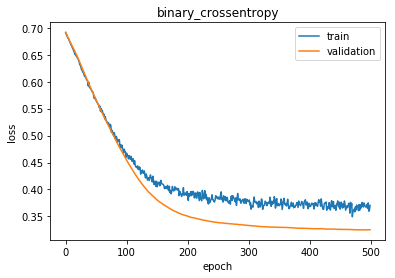

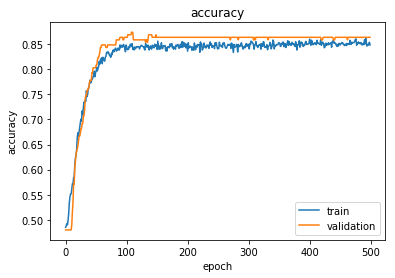

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'], loc='upper right')
plt.title('binary_crossentropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','validation'], loc='lower right')
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [6]:
y_hat=model.predict(X_train)
y_hat=y_hat>0.5
confusion_matrix=sklearn.metrics.confusion_matrix(Y_train, y_hat)

In [7]:
confusion_matrix

array([[863, 137],
       [146, 854]])

In [8]:
data_raw=pd.read_csv('test.csv')
data_x=data_raw.sequence.values.tolist()
num_sample=len(data_x)

X_test=np.zeros([num_sample,data_dim])

i=0
for sample in data_x:
    j=0
    for character in sample:
        if character == 'A':
            X_test[i,0]=X_train[i,0]+1
        if character == 'C':
            X_test[i,1]=X_train[i,1]+1
        if character == 'G':
            X_test[i,2]=X_train[i,2]+1
        if character == 'T':
            X_test[i,3]=X_train[i,3]+1
        j=j+1
    i=i+1

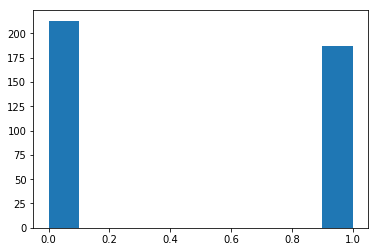

In [13]:
y_predict=model.predict(X_test)
y_predict=y_predict>0.5
y_predict=y_predict[:,0]
y_predict=y_predict.astype(int)
plt.hist(y_predict)
index=np.arange(len(y_predict))

In [15]:
dataframe = pd.DataFrame({'id':index,'prediction':y_predict})
dataframe.to_csv("output_fcnn_count.csv",index=False,sep=',')

In [14]:
y_predict.shape

(400,)

In [20]:
400*0.05

20.0

In [21]:
2/0.81578

2.451641373899826